# rnn pseudocode

~~~
state_t = 0
for input_t i input_sequence:
  output_t = activation(dot(W, input_t) + dot(U, state_t) + b)
  state_t = output_t
~~~

In [0]:
import numpy as np

timesteps = 100
input_features = 32
output_features = 64

inputs = np.random.random((timesteps, input_features))
state_t = np.zeros((output_features,))

W = np.random.random((output_features, input_features))
U = np.random.random((output_features, output_features))
b = np.random.random((output_features,))

successive_outputs = []

for input_t in inputs:
  output_t = np.tanh(np.dot(W, input_t) + np.dot(U, state_t) + b)
  successive_outputs.append(output_t)
  state_t = output_t
  

final_output_sequence = np.concatenate(successive_outputs, axis=0)

In [0]:
from keras.models import Sequential
from keras.layers import Embedding, SimpleRNN, Dense

model = Sequential()
model.add(Embedding(10000, 32))
model.add(SimpleRNN(32))
model.summary()

In [0]:
from keras.datasets import imdb
from keras.preprocessing import sequence

max_features = 10000
maxlen = 500
batch_size = 32

(input_train, y_train), (input_test, y_test) = imdb.load_data(
  num_words = max_features
)

print(len(input_train))
print(len(input_test))

In [0]:
input_train = sequence.pad_sequences(input_train, maxlen=maxlen)
input_test = sequence.pad_sequences(input_test, maxlen=maxlen)

print(input_train.shape)
print(input_test.shape)

In [0]:
model = Sequential()
model.add(Embedding(max_features, 32))
model.add(SimpleRNN(32))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop',
             loss='binary_crossentropy',
             metrics=['acc'])
history = model.fit(input_train, y_train,
                   epochs=10,
                   batch_size=128,
                   validation_split=0.2)

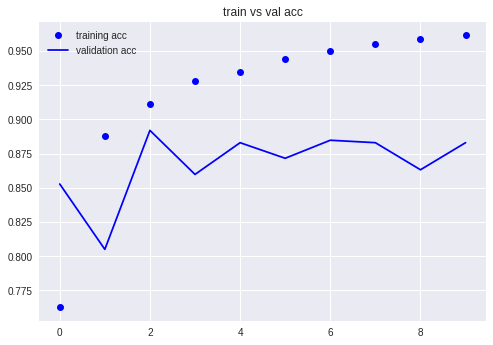

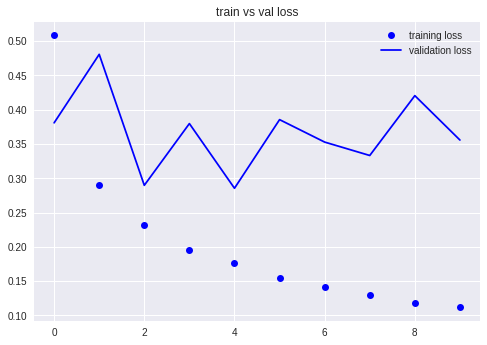

In [0]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='training acc')
plt.plot(epochs, val_acc, 'b', label='validation acc')
plt.title('train vs val acc')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='training loss')
plt.plot(epochs, val_loss, 'b', label='validation loss')
plt.title('train vs val loss')
plt.legend()

plt.show()

# LSTM pseudocode

~~~
output_t = activation(dot(state_t, Uo) + dot(input_t, Wo) + dot(C_t, Vo) + b)

i_t = activation(dot(state_t, Ui) + dot(input_t, Wi) + bi)
f_t = activation(dot(state_t, Uf) + dot(input_t, Wf) + bf)
k_t = activation(dot(state_t, Uk) + dot(input_t, Wk) + bk)

c_t+1 = i_t * k_t * c_t * f_t
~~~

In [0]:
from keras.layers import LSTM

model = Sequential()
model.add(Embedding(max_features, 32))
model.add(LSTM(32))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop',
             loss='binary_crossentropy',
             metrics=['acc'])

history = model.fit(input_train, y_train,
                   epochs=10,
                   batch_size=128,
                   validation_split=0.2)

Train on 20000 samples, validate on 5000 samples
Epoch 1/10
20000/20000 [==============================] - 190s 9ms/step - loss: 0.5082 - acc: 0.7627 - val_loss: 0.3807 - val_acc: 0.8528
Epoch 2/10
20000/20000 [==============================] - 187s 9ms/step - loss: 0.2906 - acc: 0.8880 - val_loss: 0.4806 - val_acc: 0.8050
Epoch 3/10
20000/20000 [==============================] - 187s 9ms/step - loss: 0.2325 - acc: 0.9111 - val_loss: 0.2896 - val_acc: 0.8920
Epoch 4/10
20000/20000 [==============================] - 189s 9ms/step - loss: 0.1948 - acc: 0.9283 - val_loss: 0.3796 - val_acc: 0.8598
Epoch 5/10
20000/20000 [==============================] - 190s 10ms/step - loss: 0.1761 - acc: 0.9347 - val_loss: 0.2853 - val_acc: 0.8830
Epoch 6/10
20000/20000 [==============================] - 191s 10ms/step - loss: 0.1547 - acc: 0.9446 - val_loss: 0.3854 - val_acc: 0.8716
Epoch 7/10
20000/20000 [==============================] - 191s 10ms/step - loss: 0.1418 - acc: 0.9501 - val_loss: 0.3527 

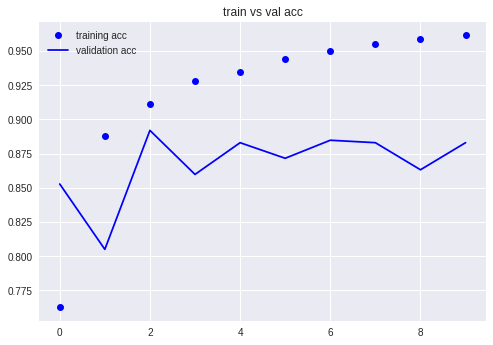

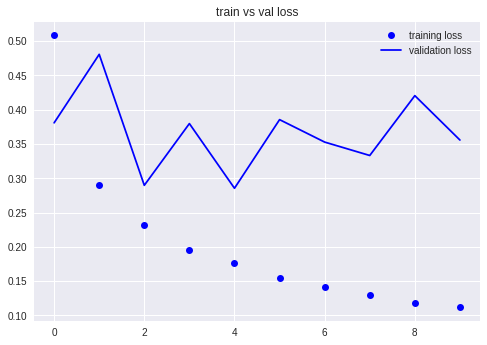

In [0]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='training acc')
plt.plot(epochs, val_acc, 'b', label='validation acc')
plt.title('train vs val acc')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='training loss')
plt.plot(epochs, val_loss, 'b', label='validation loss')
plt.title('train vs val loss')
plt.legend()

plt.show()